# <font color='DarkBlue'> <center> CUSTOMER CHURN PREDICTION

<img src="https://atrium.ai/wp-content/uploads/2021/07/What-stops-customer-churn-Having-a-centralized-data-hub-does-and-heres-why.jpeg" width="1000" height="500">

**Introduction :**
Customer satisfaction is the primary task for any Telecom company/ Service Company. Unsatisfied customers switch their service providers for better experience.

Customer churn rate is a KPI to understand the leaving customers. Churn rate represents the percentage of customers that company lost over all the customers at the beginning of the interval.

For example, If company had 400 customers at the beginning of the month and only 360 at the end of the month, means company’s churn rate is 10%, because company lost 10% of the customer base. Companies always try to minimize the churn rate to as close as 0%.

## Importing Required Dependencies

In [1]:
# importing pandas, numpy for data analysis and seaborn, matplotlib for visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##### Loading the dataset and checking the random five rows of the dataset

In [2]:
# loading the dataset from the local system and assigning it into variable "df"
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

#printing the random five rows of the dataset
df.sample(5).style.background_gradient(cmap = 'Pastel2')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6548,5012-YSPJJ,Male,0,Yes,Yes,31,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,54.350000,1647,No
6325,4558-FANTW,Female,0,Yes,Yes,17,Yes,No,Fiber optic,Yes,No,No,Yes,Yes,No,Month-to-month,No,Electronic check,91.850000,1574.45,Yes
3665,1545-JFUML,Male,0,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Two year,Yes,Electronic check,99.000000,6994.6,No
5267,8075-GXIUB,Male,1,Yes,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.850000,183.15,No
6415,8224-UAXBZ,Female,0,Yes,No,58,No,No phone service,DSL,Yes,Yes,No,No,Yes,No,One year,Yes,Electronic check,45.350000,2540.1,No


##### Checking the dimensionality and sanity of the dataset

In [3]:
# investingating the size of the dataset
print("This dataset contains:", df.shape, "of observations and features")

This dataset contains: (7043, 21) of observations and features


##### Checking the data types of the columns

In [4]:
# this returns the information about all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**`Observation`**:
- Total charges column is in object data type it should be converted into float

##### Checking if data is missing

In [5]:
#printing the null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Luckily there is no data missing, we can work on this clean data

##### Let's check if there are any duplicate values

In [6]:
# this returns us number of duplicate values
print("Total number of duplicate values = ", df.duplicated().sum())

Total number of duplicate values =  0


##### Performing Statistical Operations

In [7]:
# All columns are not visible, so we using set option method to display all the columns
pd.set_option('display.max_columns',None)

## Data Cleaning

1. Customer-Id is not much of useful for us, so we'll drop it.
2. We type cast Total charges column
3. We will convert columns with Yes or No, to binary values

In [8]:
# type casting the total charges column to float64
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

# converting all the binary categorical to binary numerical
# before replacing all the rows into binary, let's keep a copy of original data
df2 = df.copy()

def replace_yes_no(df, columns):
    """
    Replaces 'Yes' with 1, and both 'No' and 'No internet service' with 0 in specified columns of a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the columns to be replaced.
    columns (list): A list of column names where the replacement should be done.

    Returns:
    pd.DataFrame: The DataFrame with replaced values.
    """
    replacements = {'Yes': 1, 'No': 0, 'No internet service': 0}
    for column in columns:
        df[column] = df[column].replace(replacements)
    return df

columns_to_replace = ['Partner','Dependents','Dependents','PhoneService','PhoneService',
                     'OnlineSecurity','OnlineBackup','DeviceProtection',
                     'TechSupport','StreamingTV','PaperlessBilling','Churn','StreamingMovies']

# calling the function to replace all the values
df2 = replace_yes_no(df2, columns_to_replace)

#checking post type caste null values
print(df2['TotalCharges'].isnull().sum())

# replacing the null values with interpolate method
df2['TotalCharges'] = df2['TotalCharges'].interpolate()
print()
print(df2['TotalCharges'].isnull().sum())

11

0


##### Performing Statistical operation

In [9]:
# checking the features statistically
df2.describe(include='all').style.background_gradient(cmap = 'Pastel2')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043.000000,7043,7043.000000,7043.000000,7043.000000
unique,7043,2,nan,nan,nan,nan,nan,3,3,nan,nan,nan,nan,nan,nan,3,nan,4,nan,nan,nan
top,7590-VHVEG,Male,nan,nan,nan,nan,nan,No,Fiber optic,nan,nan,nan,nan,nan,nan,Month-to-month,nan,Electronic check,nan,nan,nan
freq,1,3555,nan,nan,nan,nan,nan,3390,3096,nan,nan,nan,nan,nan,nan,3875,nan,2365,nan,nan,nan
mean,nan,nan,0.162147,0.483033,0.299588,32.371149,0.903166,nan,nan,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,nan,0.592219,nan,64.761692,2283.517429,0.265370
std,nan,nan,0.368612,0.499748,0.458110,24.559481,0.295752,nan,nan,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,nan,0.491457,nan,30.090047,2266.077835,0.441561
min,nan,nan,0.000000,0.000000,0.000000,0.000000,0.000000,nan,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan,0.000000,nan,18.250000,18.800000,0.000000
25%,nan,nan,0.000000,0.000000,0.000000,9.000000,1.000000,nan,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan,0.000000,nan,35.500000,401.400000,0.000000
50%,nan,nan,0.000000,0.000000,0.000000,29.000000,1.000000,nan,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan,1.000000,nan,70.350000,1398.250000,0.000000
75%,nan,nan,0.000000,1.000000,1.000000,55.000000,1.000000,nan,nan,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,nan,1.000000,nan,89.850000,3793.050000,1.000000


**`Observation`**:

- From the above output we can say that there are few outliers in the data.
- We can see that there is a slight jump in maximum number in Tenure and Monthly charges. We have to investigate why there is a deviation.
- The minimum amount of tenure is zero which indicates few customers are new to the service and the minimum charges are 18.25 dollars

##### Checking the correlation of each columns

In [10]:
# displaying the correlation
df2.corr(numeric_only=True).style.background_gradient(cmap = 'Pastel2')

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.016479,-0.211185,0.016567,0.008576,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,0.156530,0.220173,0.102304,0.150889
Partner,0.016479,1.000000,0.452676,0.379697,0.017706,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,-0.014877,0.096848,0.318840,-0.150448
Dependents,-0.211185,0.452676,1.000000,0.159712,-0.001762,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,-0.111377,-0.113890,0.064651,-0.164221
tenure,0.016567,0.379697,0.159712,1.000000,0.008448,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.006152,0.247900,0.824239,-0.352229
PhoneService,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.016505,0.247398,0.112357,0.011942
OnlineSecurity,-0.038653,0.143106,0.080972,0.327203,-0.092893,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,-0.003636,0.296594,0.412208,-0.171226
OnlineBackup,0.066572,0.141498,0.023671,0.360277,-0.052312,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.126735,0.441780,0.509808,-0.082255
DeviceProtection,0.059428,0.153786,0.013963,0.360653,-0.071227,0.275438,0.303546,1.000000,0.333313,0.390874,0.402111,0.103797,0.482692,0.522516,-0.066160
TechSupport,-0.060625,0.119999,0.063268,0.324221,-0.096340,0.354931,0.294233,0.333313,1.000000,0.278070,0.279358,0.037880,0.338304,0.433043,-0.164674
StreamingTV,0.105378,0.124666,-0.016558,0.279756,-0.022574,0.176207,0.282106,0.390874,0.278070,1.000000,0.533094,0.223841,0.629603,0.515357,0.063228


SeniorCitizen       0.150889
Partner            -0.150448
Dependents         -0.164221
tenure             -0.352229
PhoneService        0.011942
OnlineSecurity     -0.171226
OnlineBackup       -0.082255
DeviceProtection   -0.066160
TechSupport        -0.164674
StreamingTV         0.063228
StreamingMovies     0.061382
PaperlessBilling    0.191825
MonthlyCharges      0.193356
TotalCharges       -0.199390
Churn               1.000000
Name: Churn, dtype: float64


<Axes: >

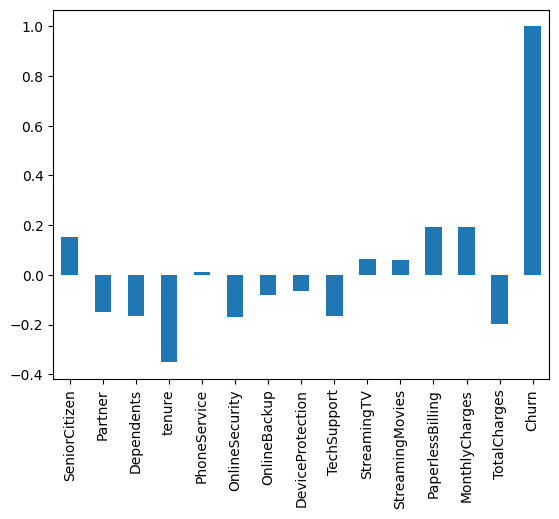

In [11]:
# let's check the correlation to the target variable
print(df2.corr(numeric_only=True)['Churn'])

# visualizing the correlation for better understanding
df2.corr(numeric_only=True)['Churn'].plot(kind='bar')

**`Observation`**:
- Internet Service which has fibre optic, payment method which has electronic check and monthly charges are seemed to be postively related to churn.

- Interestingly services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

- Let us first start with exploring our data set, to better understand the patterns in the data and potentially form some hypothesis. First we will look at the distribution of individual variables and then slice and dice our data for any interesting trends.

**We are going to analyze the data on 1. customer based, 2. customer account based and 3.services based**

### Let's check if relationship exists between remaining categorical column towards target variable using ChiSquare. if exists let' check the strength of the relationship using Cramers V

#### 1. chi-Square
- The chi-square test is used to determine whether there is a significant association between two categorical variables. It answers the question: Is there a relationship between these variables?

#### 2. Cramers V
- Cramér's V is a post-test statistic used after the chi-square test to measure the strength of association between two categorical variables. It answers the question: How strong is the relationship be

In [12]:
import scipy.stats
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

def chi_square_test(df, categorical_columns, target):
    results = {}
    for column in categorical_columns:
        confusion_matrix = pd.crosstab(df[column], df[target])
        chi2, p, dof, ex = chi2_contingency(confusion_matrix)
        cramers_v_value = cramers_v(confusion_matrix)
        results[column] = {
            'chi2': chi2,
            'p-value': p,
            'Cramér\'s V': cramers_v_value
        }
    return pd.DataFrame(results).T

# List of categorical columns and the target variable
categorical_columns = ['MultipleLines', 'InternetService', 'StreamingMovies', 'Contract', 'PaymentMethod']
target_variable = 'Churn'

# Perform the chi-square test and compute Cramér's V
results = chi_square_test(df, categorical_columns, target_variable)

print(results)

                        chi2   p-value  \
MultipleLines      11.330441  0.003464   
InternetService    732.30959       0.0   
StreamingMovies   375.661479       0.0   
Contract         1184.596572       0.0   
PaymentMethod     648.142327       0.0   

                                                        Cramér's V  
MultipleLines    Churn
No     0.046796
Yes    0.077861
dtype: f...  
InternetService  Churn
No     0.376213
Yes    0.625954
dtype: f...  
StreamingMovies  Churn
No     0.269454
Yes    0.448326
dtype: f...  
Contract         Churn
No     0.478489
Yes    0.796124
dtype: f...  
PaymentMethod    Churn
No     0.353934
Yes    0.588885
dtype: f...  


**`Observation`**:
1. MultipleLines:

* Chi-square statistic: 11.330441
* P-value: 0.003464
* Cramér's V: (values seem to be a bit unclear, but assuming it's between 0 and 1)
* This indicates a significant association between MultipleLines and Churn since the p-value is less than 0.05.
* However, the Cramér's V value appears to be relatively low, suggesting that while there is a statistically significant association, the strength of this association is weak.

2. InternetService:

* Chi-square statistic: 732.30959
* P-value: 0.0
* Cramér's V: 0.376213 (assuming corrected interpretation)
* The very low p-value indicates a highly significant association between InternetService and Churn.
* The Cramér's V value indicates a moderate association strength.

3. StreamingMovies:

* Chi-square statistic: 375.661479
* P-value: 0.0
* Cramér's V: 0.269454 (assuming corrected interpretation)
* The extremely low p-value suggests a highly significant association between StreamingMovies and Churn.
* The Cramér's V value indicates a moderate association, though it is on the weaker side of moderate.

4. Contract:

* Chi-square statistic: 1184.596572
* P-value: 0.0
* Cramér's V: 0.478489 (assuming corrected interpretation)
* The p-value of 0.0 indicates a very strong significant association between Contract and Churn.
* The Cramér's V value indicates a relatively strong association, suggesting that the type of contract a customer has is strongly related to whether they churn.

5. PaymentMethod:

* Chi-square statistic: 648.142327
* P-value: 0.0
* Cramér's V: 0.353934 (assuming corrected interpretation)
* The p-value of 0.0 suggests a highly significant association between PaymentMethod and Churn.
* The Cramér's V value indicates a moderate association, suggesting that the method of payment has a noticeable impact on customer churn.

**Let's perform Exploratory Data Analysis and find out this hypothesis is true or not**

## Exploratory Data Analysis

* **We are going to analyze the data on**

1. customer based
2. customer account based
3. services based**

### Distributions of Monthly and Total Charges, Tenure Columns

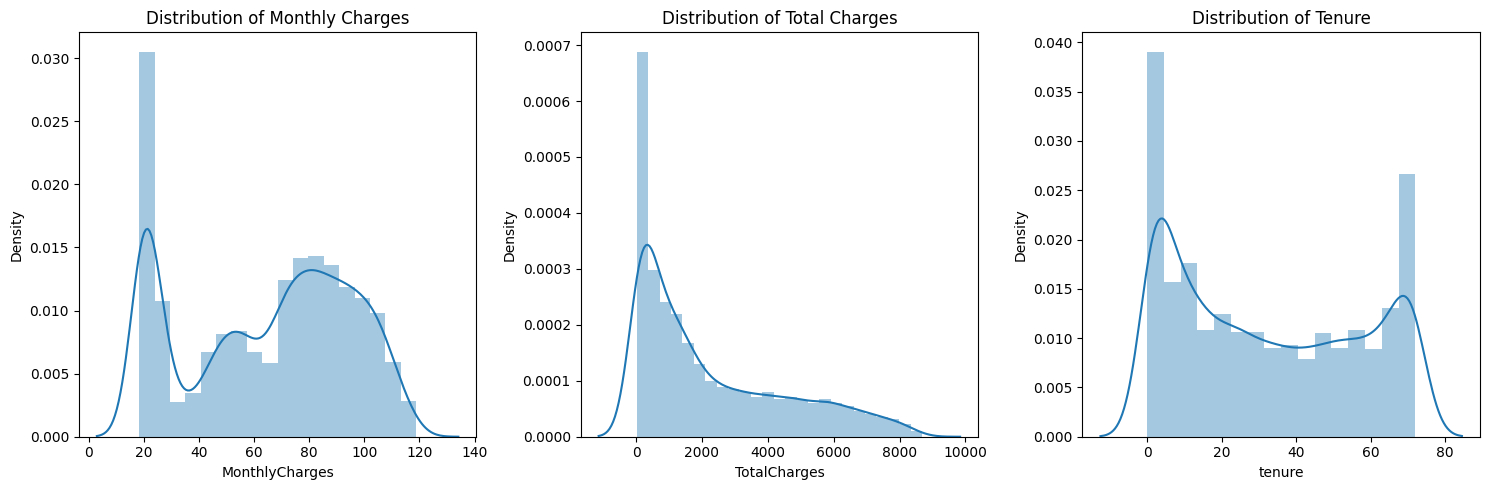

In [13]:
# Creating a figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting the distribution plot for 'MonthlyCharges'
sns.distplot(df['MonthlyCharges'], ax=axes[0])
axes[0].set_title('Distribution of Monthly Charges')

# Plotting the distribution plot for 'TotalCharges'
sns.distplot(df['TotalCharges'], ax=axes[1])
axes[1].set_title('Distribution of Total Charges')

# Plotting the distribution plot for 'tenure'
sns.distplot(df['tenure'], ax=axes[2])
axes[2].set_title('Distribution of Tenure')

# Adjusting layout and show plot
plt.tight_layout()
plt.show()

**`Observation`**:

**Distribution of Monthly Charges:**

- This graph displays the distribution of monthly charges for a certain dataset.
- There are two prominent peaks: one near 20 and another around 80.
- The density is highest at these two points, indicating that a significant  number of customers have monthly charges around these values.

**Distribution of Total Charges:**

- The second graph represents the distribution of total charges.
- It has a sharp peak near 0, suggesting that many customers have low total charges.
- As total charges increase, the density decreases steadily.

**Distribution of Tenure:**

- The third graph shows the distribution of tenure (the duration of customer relationships).
- Similar to the first graph, it also has two noticeable peaks.
- One peak is near 0 (indicating new customers), and the other is around 70 (representing long-term customers).

### Distribution of Target variable

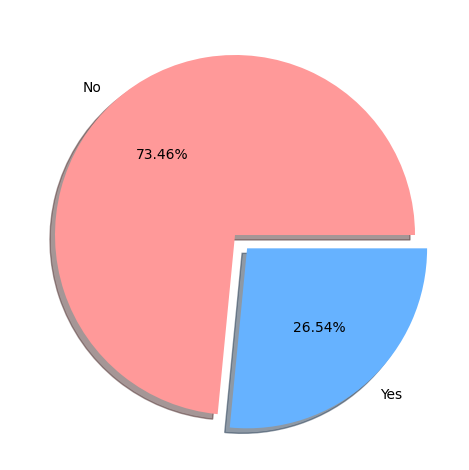

In [15]:
# counting the Churn values
Churn = df['Churn'].value_counts()
labels = Churn.index
colors = ['#FF9999', '#66B2FF']

#plotting the pie chart to represent values in percentages
plt.pie(Churn, labels=labels, shadow=True, autopct='%1.2f%%',
       colors=colors, explode=(0,0.1))

plt.tight_layout()
plt.show()

**`Observation`**

- The pie chart illustrates the proportion of customers who churned (labeled “Yes”) versus those who did not churn (labeled “No”).
- Approximately 26.54% of customers churned, while the remaining 73.46% did not.
This indicates that a significant majority of customers remained loyal and did not switch to another service or provider.

The data is imbalance, gotta oversample using SMOTE

### A. demographics: Let us first understand the gender, partner and dependent status of the customers

### 1. Gender Distribution of customers

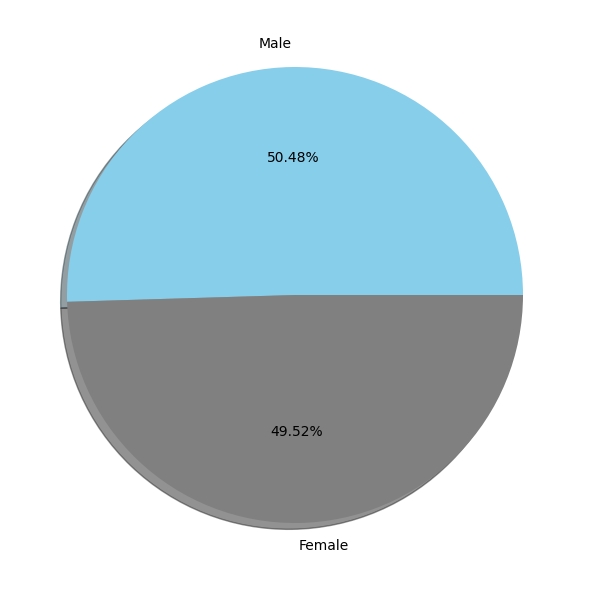

In [16]:
# count of the Gender values
gender = df2['gender'].value_counts()
labels = gender.index # extracting the labels and assigning them into
colors = ['#87CEEB','#808080']

#adjusting figure size for better visibility
plt.figure(figsize=(8,6))
plt.pie(gender, labels=labels, autopct='%1.2f%%', shadow=True,
        colors=colors, labeldistance=1.1, normalize=True)

plt.tight_layout()
plt.show()

**`Observation`**
- gender Column is equally distributed
- Male customers are higher in .48%

### 2. Dependent and Partner Status


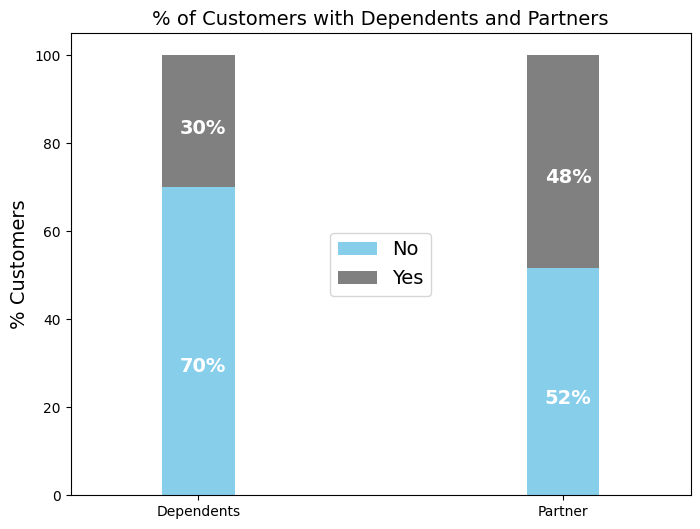

In [17]:
# Melting the DataFrame
df_melted = pd.melt(df, id_vars=['customerID'], value_vars=['Dependents', 'Partner'])

# Grouping by variable and value and calculating the percentages
df_grouped = df_melted.groupby(['variable', 'value']).count().unstack()
df_percentages = df_grouped * 100 / len(df)

# Plotting

ax = df_percentages.loc[:, 'customerID'].plot.bar(stacked=True,
                                                  color=colors, figsize=(8, 6),
                                                  rot=0, width=0.2)

# Setting labels and title
ax.set_ylabel('% Customers', size=14)
ax.set_xlabel('')
ax.set_title('% of Customers with Dependents and Partners', size=14)
ax.legend(loc='center', prop={'size': 14})

# Adding the data labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height),
                (p.get_x() + .25 * width, p.get_y() + .4 * height),
                color='white', weight='bold', size=14)


**`Observations`**

**Dependents:**

- Approximately 70% of customers have dependents (indicated in blue).
- The remaining 30% do not have dependents (indicated in grey).

**Partners:**

- About 52% of customers have partners (indicated in blue).
- The other 48% do not have partners (indicated in grey).

### Senior Citizen

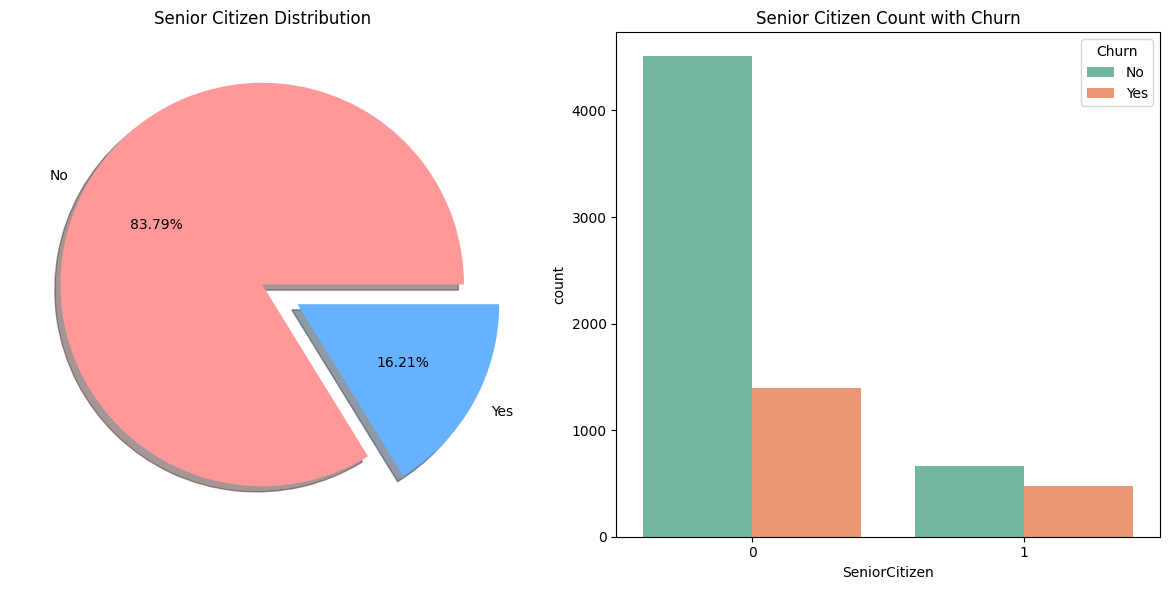

In [18]:
# Counting the values of 'SeniorCitizen' and assigning it to a variable
senior = df['SeniorCitizen'].value_counts()
labels = ['No', 'Yes']
explode = (0, 0.2)
colors = ['#FF9999', '#66B2FF']  # Define colors for the pie chart

# Creating subplots with appropriate layout and figure size
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the pie chart in the first subplot
axes[0].pie(senior, labels=labels, shadow=True, autopct='%1.2f%%', colors=colors, explode=explode)
axes[0].set_title('Senior Citizen Distribution')

# Plotting the countplot with 'hue' as 'Churn' in the second subplot
sns.countplot(x='SeniorCitizen', data=df, hue='Churn', ax=axes[1], palette='Set2')
axes[1].set_title('Senior Citizen Count with Churn')

# Adjusting layout and show plot
plt.tight_layout()
plt.show()

**`Observation`**
- Among the cutomers only 16.21 are senior citizens
- Most churning customers are younger or middle aged people
- Churning rate in senior citizens is less

### Customer Account based Analysis
### 1. Tenure and Contract

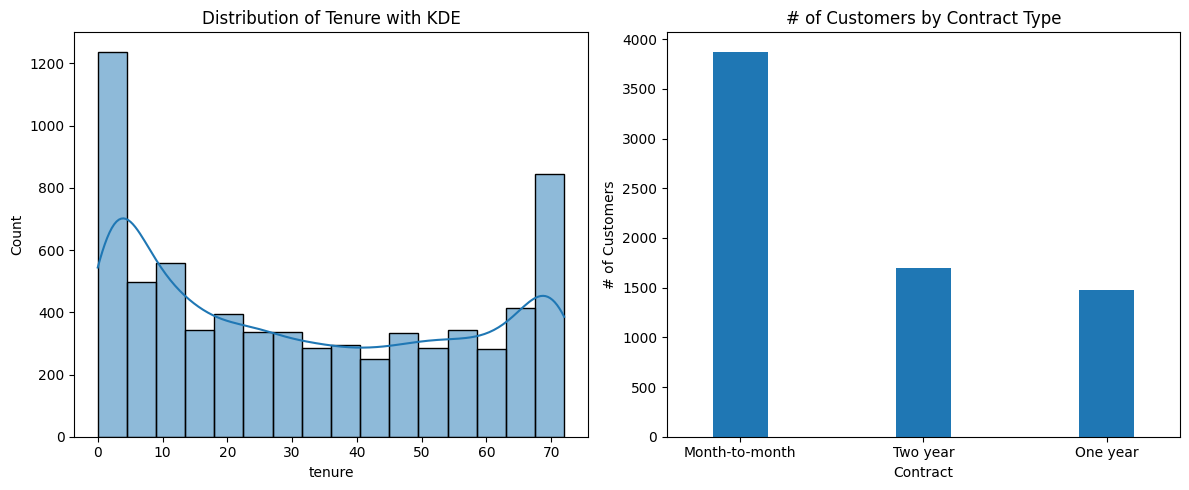

In [19]:
# adjusting the figure size and creating subplots for better visibility
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plotting the distribution plot for 'tenure' with KDE
sns.histplot(df['tenure'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Tenure with KDE')

# Plotting the bar plot for '# of Customers by Contract Type'
ax = df['Contract'].value_counts().plot(kind='bar',
                                        rot=0, width=0.3,
                                        ax=axes[1])
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

**`Observations`**

**Distribution of Tenure with KDE:**

- The left graph displays the distribution of customer tenure.
- It exhibits a bimodal distribution, meaning there are two significant peaks.
- The first peak occurs around 0-10 tenure, indicating a large number of new customers.
- The second peak is near 70 tenure, suggesting a substantial group of long-term customers.
- The Kernel Density Estimation (KDE) line overlays the bars, showing the probability density function.

 **Number of Customers by Contract Type:**
- The right graph represents the number of customers based on contract type.
- The majority of customers are on month-to-month contracts (indicated by the blue bar).
- Two-year contracts come next (also in blue), followed by one-year contracts (grey bar).

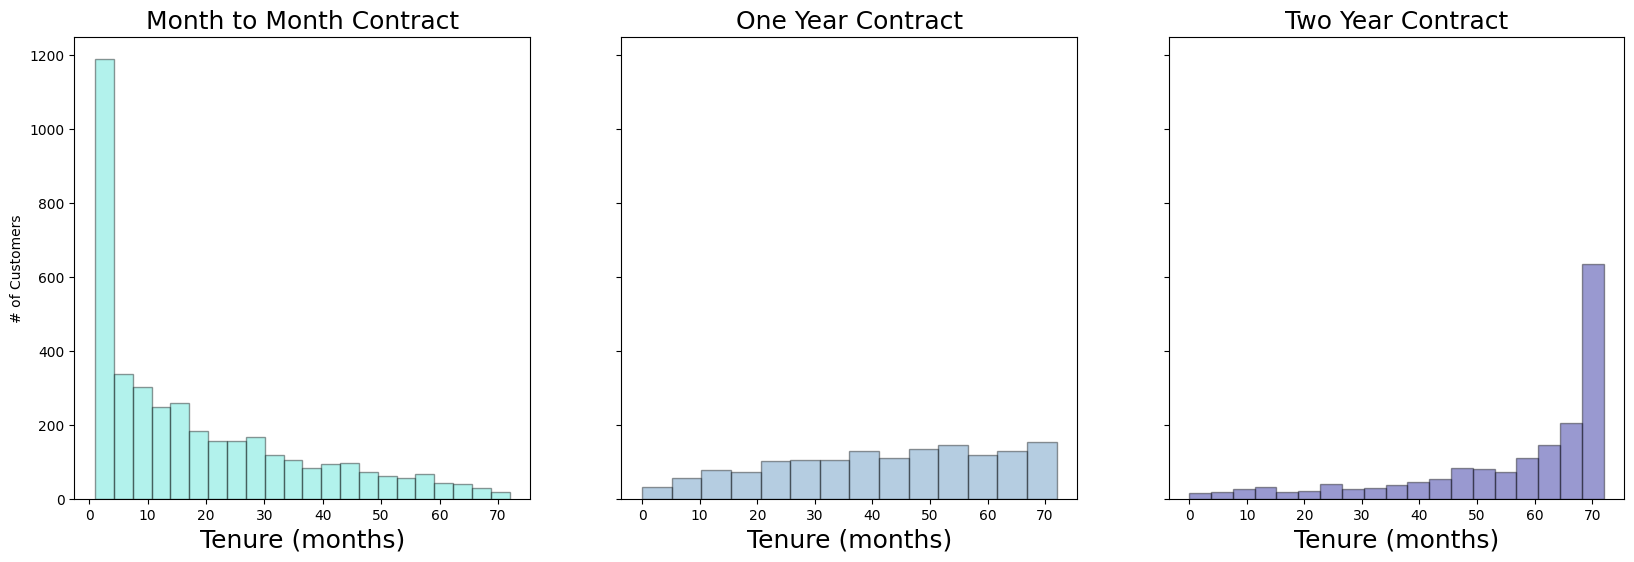

In [20]:
# Creating subplots with shared y-axis and appropriate figure size
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20, 6))

# Plotting the distribution plot for Month-to-Month Contract
ax = sns.distplot(df[df['Contract'] == 'Month-to-month']['tenure'],
                  hist=True, kde=False,
                  color='turquoise',
                  hist_kws={'edgecolor': 'black'},
                  kde_kws={'linewidth': 4},
                  ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)', size=18)
ax.set_title('Month to Month Contract', size=18)

# Plotting the distribution plot for One Year Contract
ax = sns.distplot(df[df['Contract'] == 'One year']['tenure'],
                  hist=True, kde=False,
                  color='steelblue',
                  hist_kws={'edgecolor': 'black'},
                  kde_kws={'linewidth': 4},
                  ax=ax2)
ax.set_xlabel('Tenure (months)', size=18)
ax.set_title('One Year Contract', size=18)

# Plotting the distribution plot for Two Year Contract
ax = sns.distplot(df[df['Contract'] == 'Two year']['tenure'],
                  hist=True, kde=False,
                  color='darkblue',
                  hist_kws={'edgecolor': 'black'},
                  kde_kws={'linewidth': 4},
                  ax=ax3)

ax.set_xlabel('Tenure (months)', size=18)
ax.set_title('Two Year Contract', size=18)

plt.show()

### Services

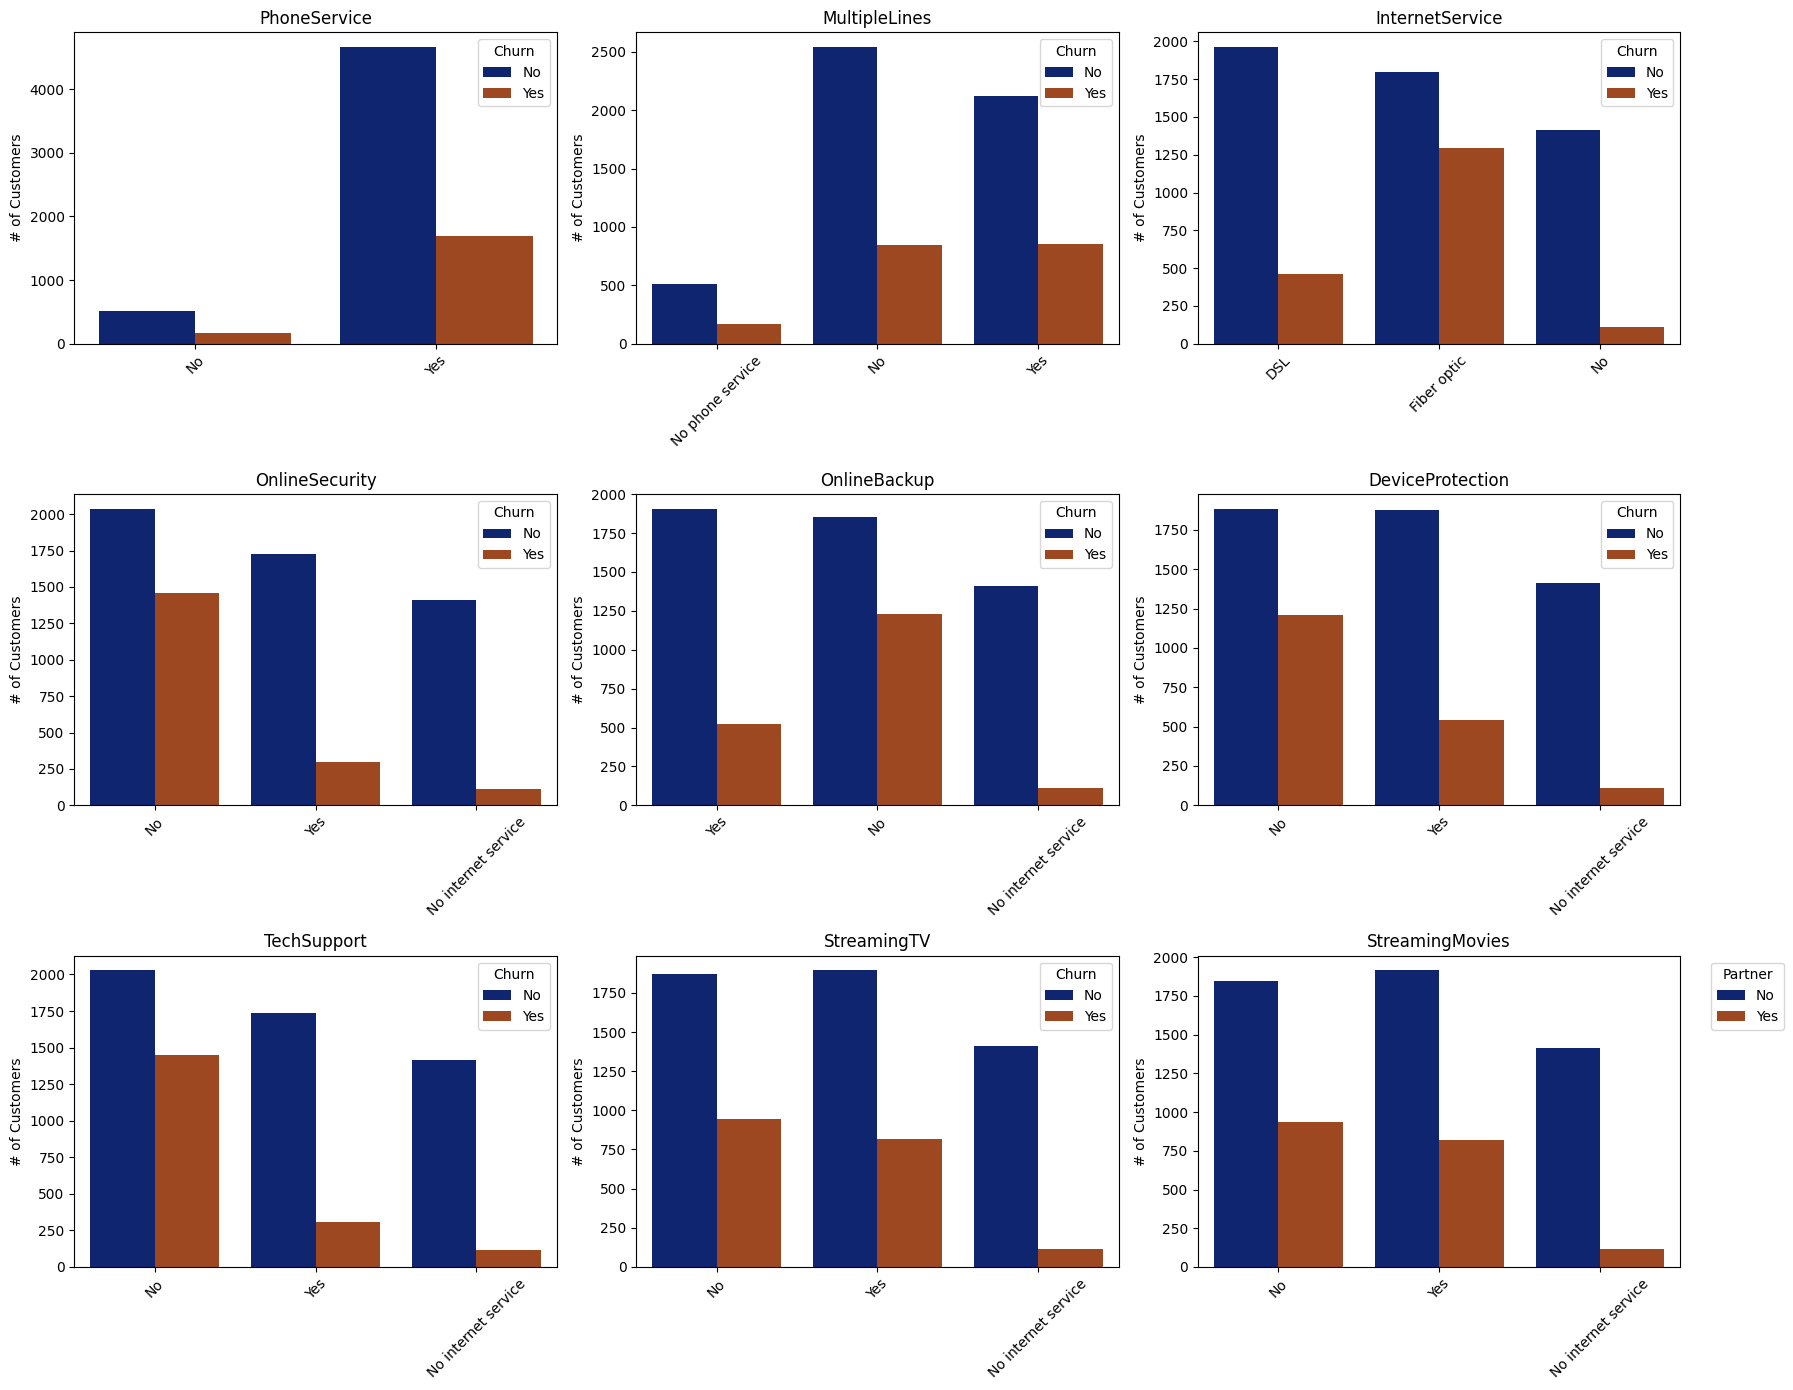

In [21]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Creating subplots with appropriate layout and figure size
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 14))

# Flattening the axes array for easier iteration
axes = axes.flatten()

# Iterating through the services and plot on respective subplots with 'hue' as 'Partner'
for i, item in enumerate(services):
    ax = sns.countplot(x=item, data=df, hue='Churn', ax=axes[i], palette='dark')
    ax.set_title(item)
    ax.set_xlabel('')  # Remove x-axis label
    ax.set_ylabel('# of Customers')
    ax.tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels

# Adding legend outside the subplots
plt.legend(title='Partner', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjusting layout and show plot
plt.tight_layout()
plt.show()

`OBSERVATIONS`:
- Tech Support has high churn distribution
- Lack of tech support gives a bad service experience to the customers
- Customers who are not streaming TV are more likely to churn
- Customers who deos'nt have Online Security are might feeling lack of security. There is high churning rate
- Customers who doesn't have a device protection are also likely to churn

### 3. Customers with partners and their services

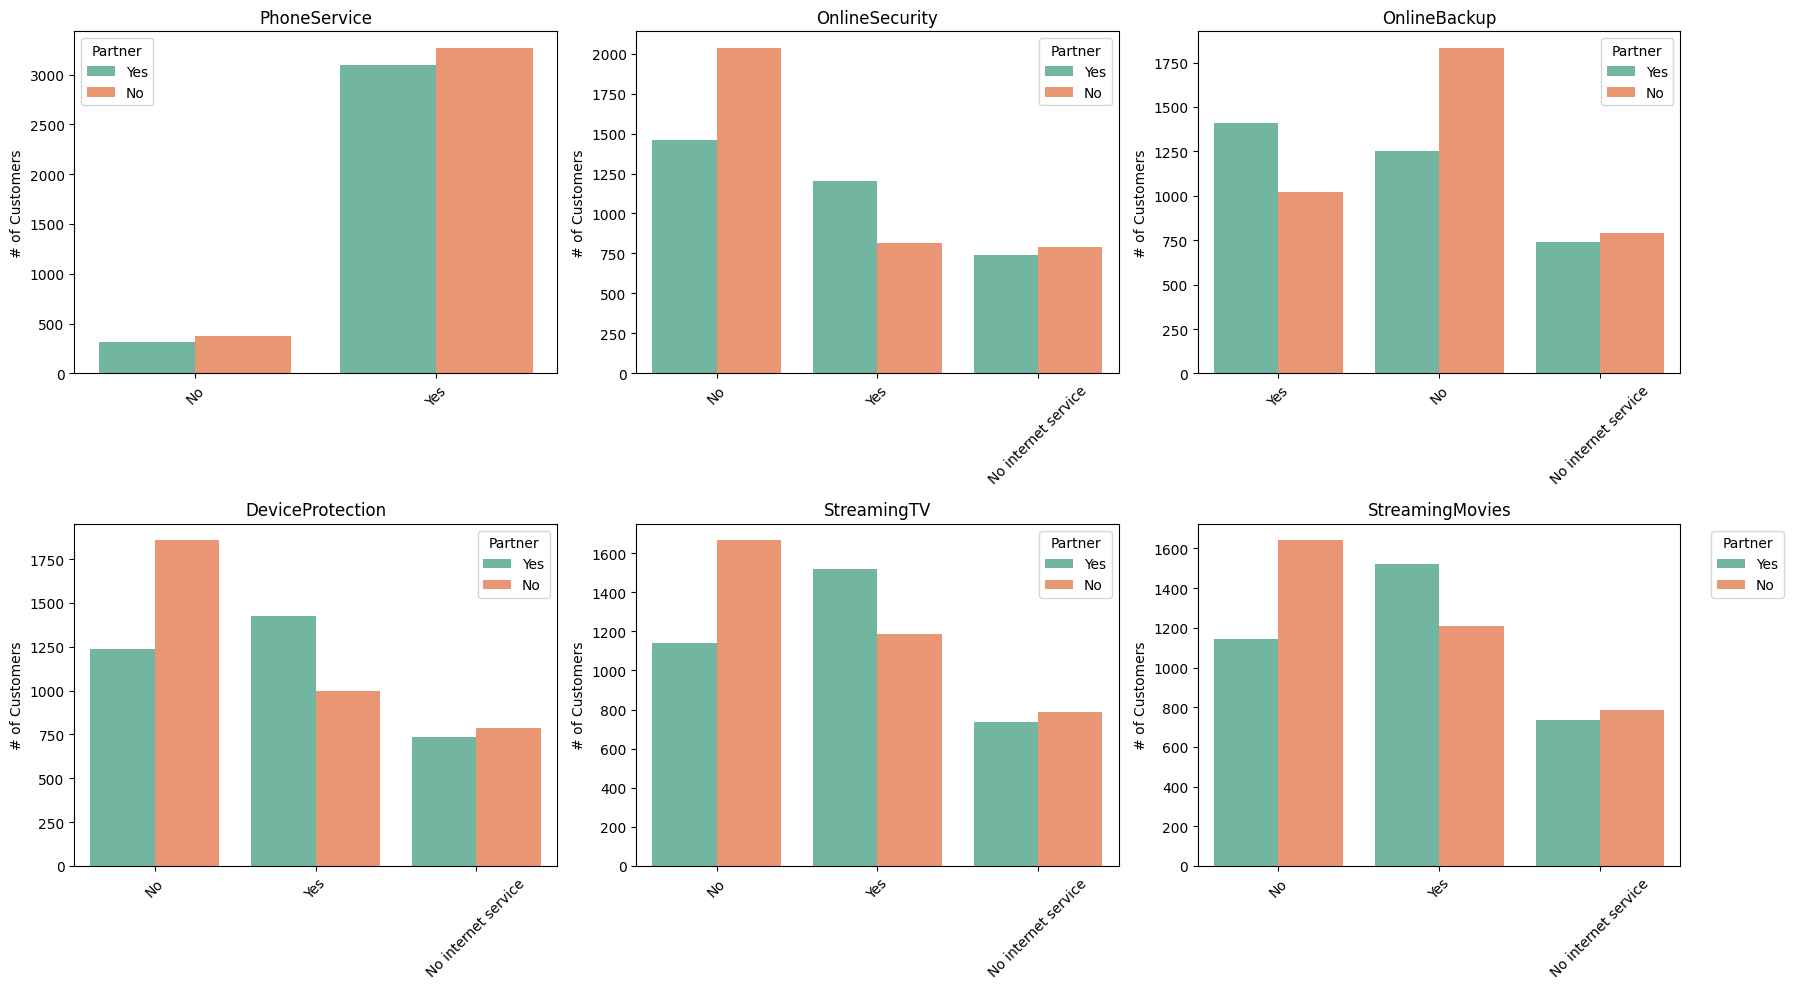

In [22]:
services = ['PhoneService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'StreamingTV', 'StreamingMovies']

# Creating subplots with appropriate layout and figure size
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Flattening the axes array for easier iteration
axes = axes.flatten()

# Iterating through the services and plot on respective subplots with 'hue' as 'Partner'
for i, item in enumerate(services):
    ax = sns.countplot(x=item, data=df, hue='Partner', ax=axes[i], palette='Set2')
    ax.set_title(item)
    ax.set_xlabel('')  # Remove x-axis label
    ax.set_ylabel('# of Customers')
    ax.tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels

# Adding legend outside the subplots
plt.legend(title='Partner', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjusting layout and show plot
plt.tight_layout()
plt.show()

`Observtions`:
- customers with parners are utlizing the phone service and less likely to churn
- Customers with partners with streamTv and StreamMovies are more likely to churn
- Maybe cutomers feeling recommendations or the partnering channels are not good

### Customer with Dependents and the services they are using

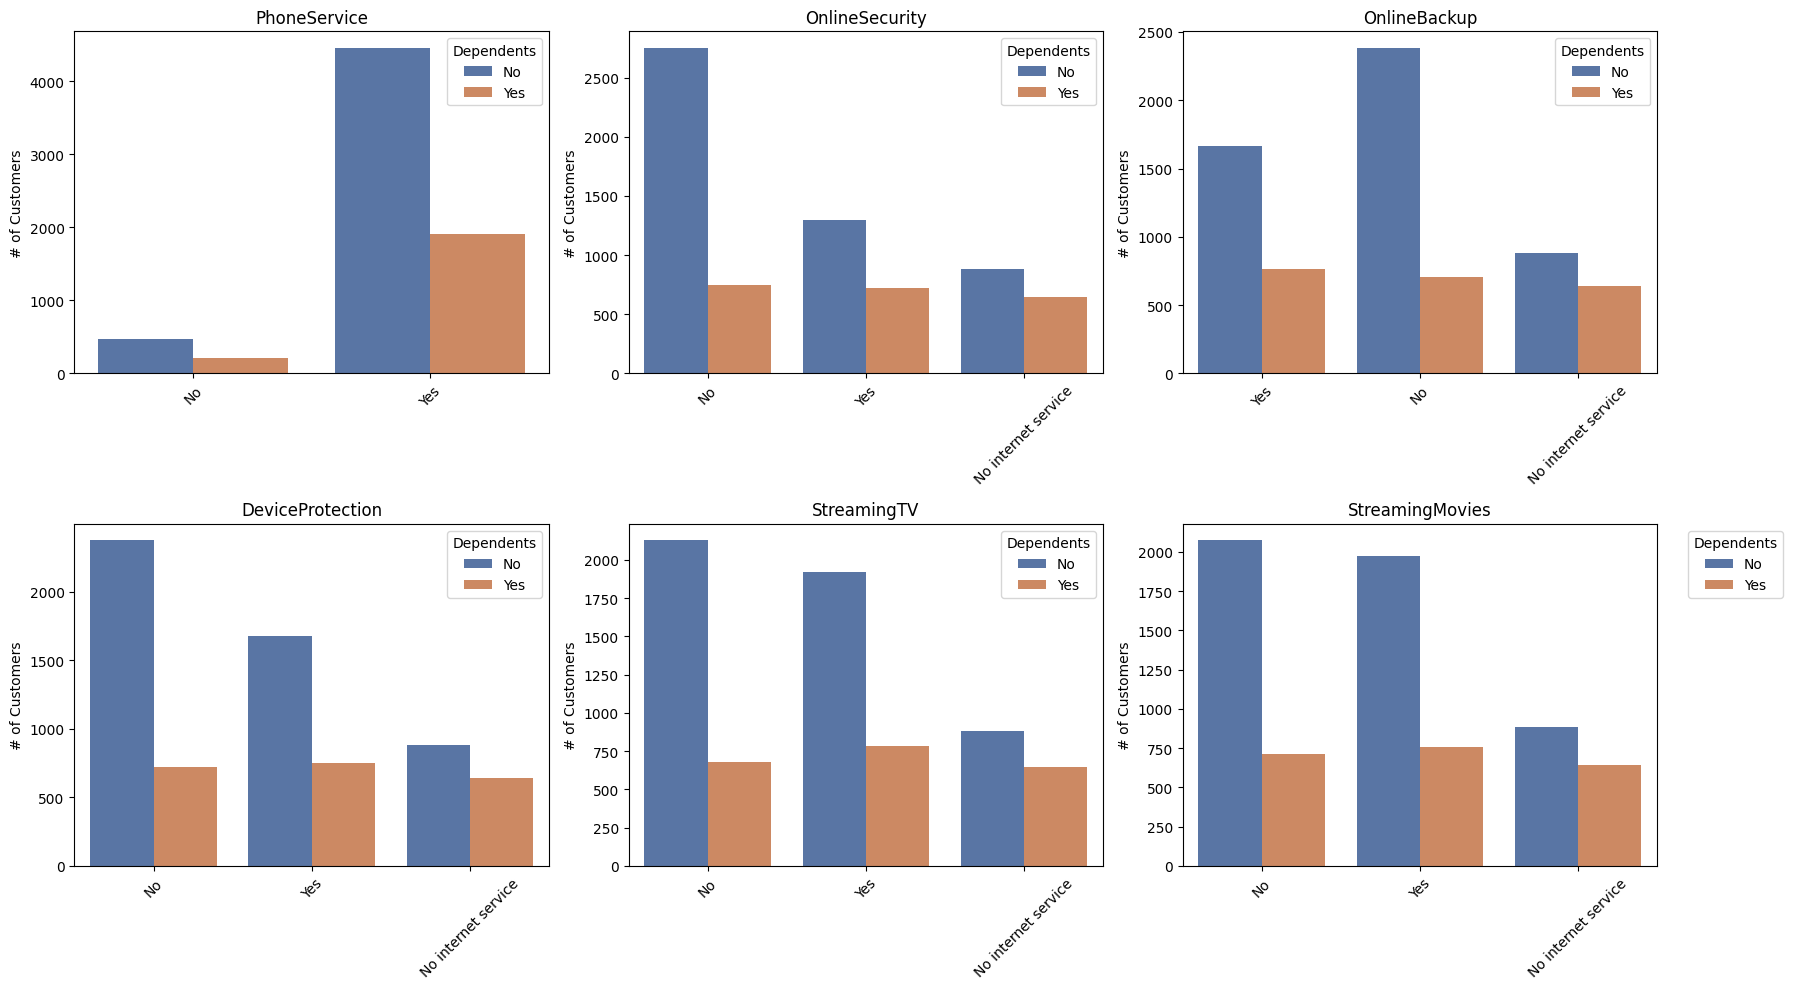

In [23]:
services = ['PhoneService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'StreamingTV', 'StreamingMovies']

# Creating subplots with appropriate layout and figure size
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Flattening the axes array for easier iteration
axes = axes.flatten()

# Iterating through the services and plot on respective subplots with 'hue' as 'Partner'
for i, item in enumerate(services):
    ax = sns.countplot(x=item, data=df, hue='Dependents', ax=axes[i], palette='deep')
    ax.set_title(item)
    ax.set_xlabel('')  # Remove x-axis label
    ax.set_ylabel('# of Customers')
    ax.tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels

# Adding legend outside the subplots
plt.legend(title='Dependents', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjusting layout and show plot
plt.tight_layout()
plt.show()

`Observations`:
- Customers with children form a moderate churn ratio
- Mostly they are churning with the phone service

### Senior Citizens

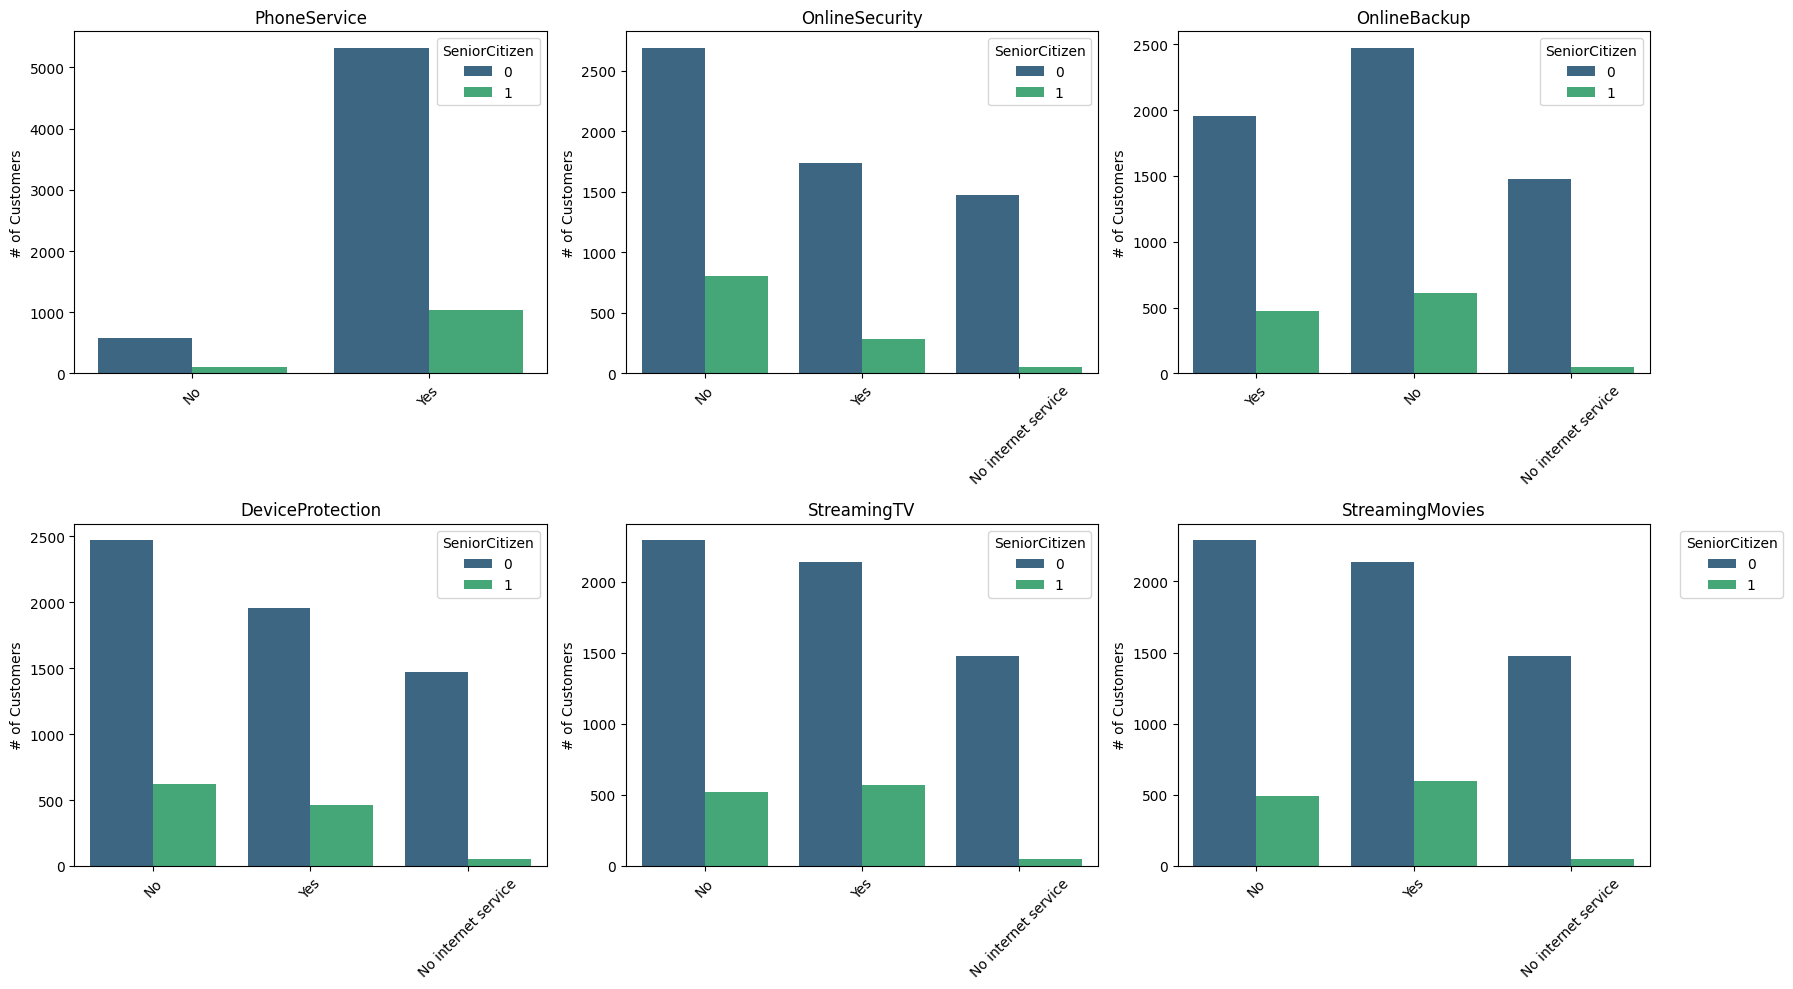

In [24]:
services = ['PhoneService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'StreamingTV', 'StreamingMovies']

# Creating subplots with appropriate layout and figure size
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Flattening the axes array for easier iteration
axes = axes.flatten()

# Iterating through the services and plot on respective subplots with 'hue' as 'Partner'
for i, item in enumerate(services):
    ax = sns.countplot(x=item, data=df, hue='SeniorCitizen', ax=axes[i], palette='viridis')
    ax.set_title(item)
    ax.set_xlabel('')  # Remove x-axis label
    ax.set_ylabel('# of Customers')
    ax.tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels

# Adding legend outside the subplots
plt.legend(title='SeniorCitizen', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjusting layout and show plot
plt.tight_layout()
plt.show()

### Let's see the relation between Montly charges and Total Charges

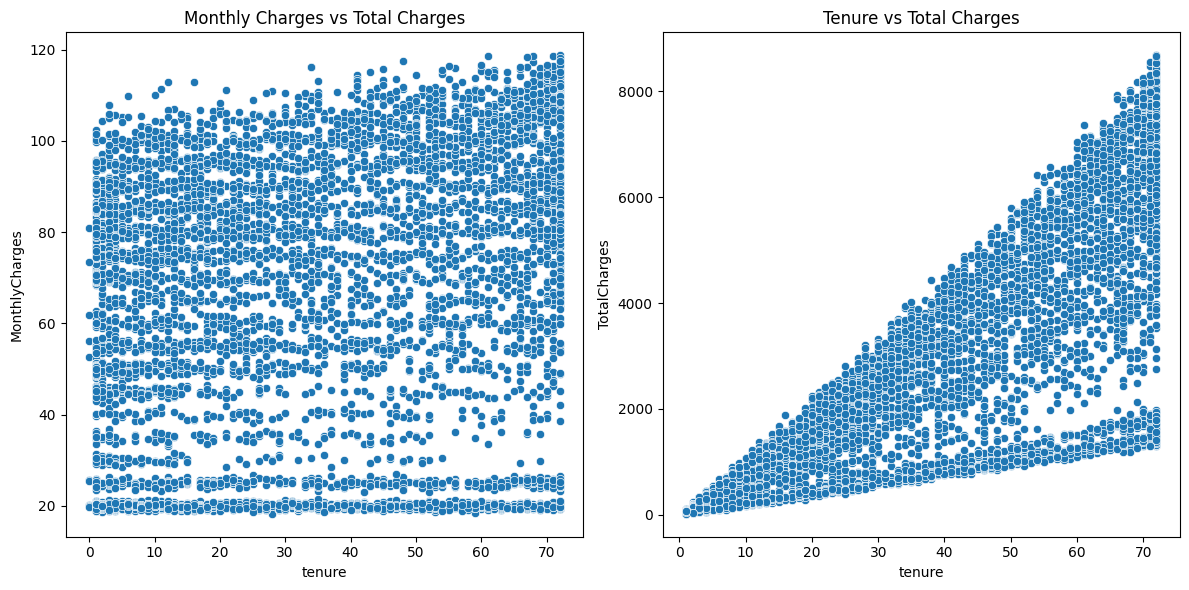

In [25]:
# Create subplots with appropriate layout and figure size
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the scatter plot for 'MonthlyCharges' vs 'TotalCharges' in the second subplot
sns.scatterplot(x='tenure', y='MonthlyCharges', data=df, ax=axes[0], palette='viridis', markers=True)
axes[0].set_title('Monthly Charges vs Total Charges')

# Plotting the scatter plot for 'tenure' vs 'TotalCharges' in the first subplot
sns.scatterplot(x='tenure', y='TotalCharges', data=df, ax=axes[1])
axes[1].set_title('Tenure vs Total Charges')

# Show the plot
plt.tight_layout()
plt.show()

`Observations`

**Monthly Charges vs Total Charges:**

- The left scatter plot shows the relationship between monthly charges and total charges.
- There is a wide distribution of data points, indicating variability.
- No clear pattern or trend is visible; the points are scattered randomly.

**Tenure vs Total Charges:**

-The right scatter plot illustrates the relationship between tenure (duration of customer relationship) and total charges.
- There is a clear positive correlation:
- As tenure increases, total charges also increase.
- The data points form a triangular shape, suggesting that long-term customers tend to have higher total charges.

#### Lets now explore the churn rate by Partner and Dependent Status, Senior Citizen,  tenure, seniority, contract type, monthly charges and total charges to see how it varies by these variables.
### 1. Partner and dependent

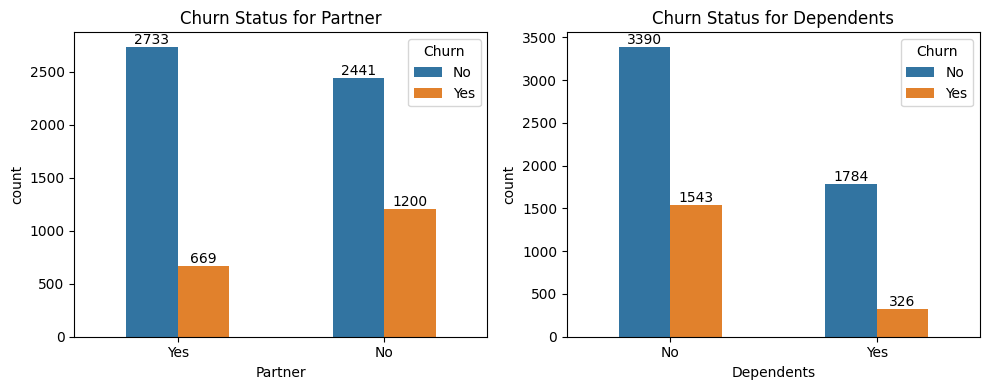

In [60]:
# Create subplots with appropriate layout and figure size
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plotting the first count plot in the first subplot
sns.countplot(x='Partner', data=df, hue='Churn', width=0.5, ax=axes[0])
axes[0].set_title('Churn Status for Partner')

# Plotting the second count plot in the second subplot
sns.countplot(x='Dependents', data=df, hue='Churn', width=0.5, ax=axes[1])
axes[1].set_title('Churn Status for Dependents')

# Adding data labels to both subplots
for ax in axes:
    for container in ax.containers:
        ax.bar_label(container)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

`Observation`:
- From the above grapgh we can say that cutomers who are single are more likely to churn
- Maybe the lack of services and content shown are not attracting the single customers

### 2. Churn vs Tenure

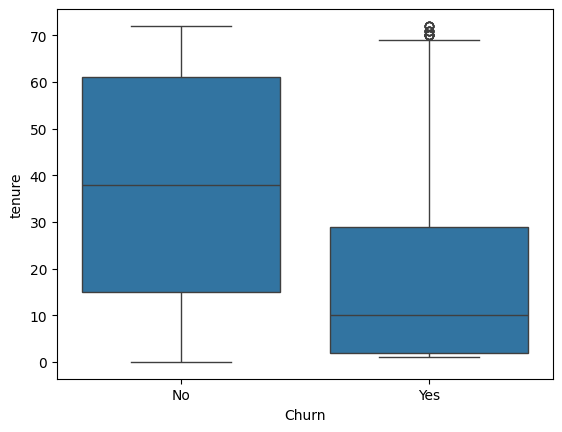

In [27]:
# plotting the boxplot
sns.boxplot(x = df['Churn'], y = df['tenure'])
plt.show()

`Observations`: As we observed above the longer the tenure and contract the lesser the churning chances of the customers

### 3. Contract vs Churn

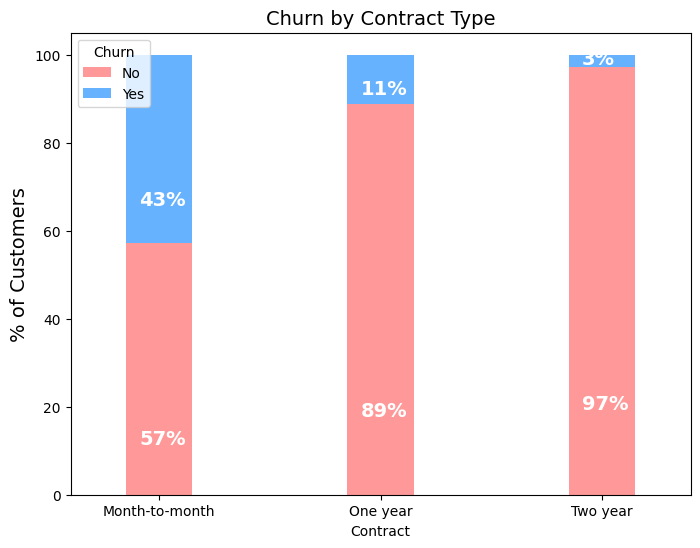

In [28]:
# grouping the contract and churn
contract_churn = df.groupby(['Contract','Churn']).size().unstack()

#plotting the graph
ax = (contract_churn.T*100.0 / contract_churn.T.sum()
     ).T.plot(kind='bar', width = 0.3, stacked = True,
              rot = 0, figsize = (8,6), color = colors)

ax.legend(loc='best',prop={'size':10},title = 'Churn')
ax.set_ylabel('% of Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height),
                (p.get_x()+.20*width, p.get_y()+.2*height),
                color = 'white', weight = 'bold', size = 14)

`Observations`: People who opt for longer contract stay loyal to the company. people with month to month contract are more churning

### 4. Internet Sevice vs Churn

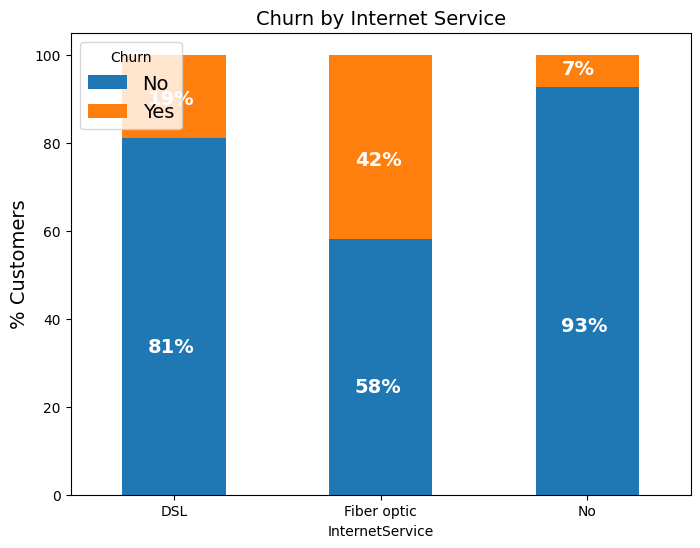

In [29]:
churn = df.groupby(['InternetService','Churn']).size().unstack()

ax = (churn.T*100.0 / churn.T.sum()).T.plot(kind='bar', stacked = True,
                                            rot = 0, figsize = (8,6))

ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Internet Service',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

`Observation`
-  Strangely customers with no internet services have only 7% churn rate, and customers with DSL's churn percentae is 19% and Fiber Optic is 58%. Fiber optic is new technology which has a drawback of wire damage issues so it might be the one of the reasons for about 60% churn

### 5. Payment Method vs Churn

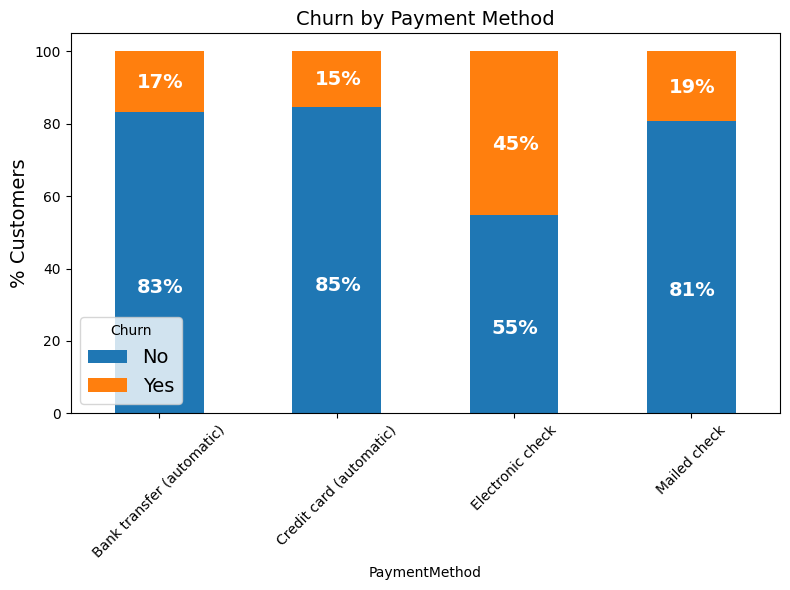

In [30]:
churn = df.groupby(['PaymentMethod', 'Churn']).size().unstack()
churn_percentage = (churn.T * 100.0 / churn.T.sum()).T

# Plotting the stacked bar chart
ax = churn_percentage.plot(kind='bar', stacked=True, rot=0, figsize=(8, 6))

ax.legend(loc='best', prop={'size': 14}, title='Churn')
ax.set_ylabel('% Customers', size=14)
ax.set_title('Churn by Payment Method', size=14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height),
                (p.get_x() + .25 * width, p.get_y() + .4 * height),
                color='white', weight='bold', size=14)

# Rotate x-axis ticks to 45 or 60 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Adjust the rotation angle as needed

plt.tight_layout()
plt.show()

`Observations`:
- The automatic payment customers have less churning rate.
- people who have manual payment method are highly churning
- Company can give offers on automatic payments to avoid the churning customers

### 6. Churn by TechSupport

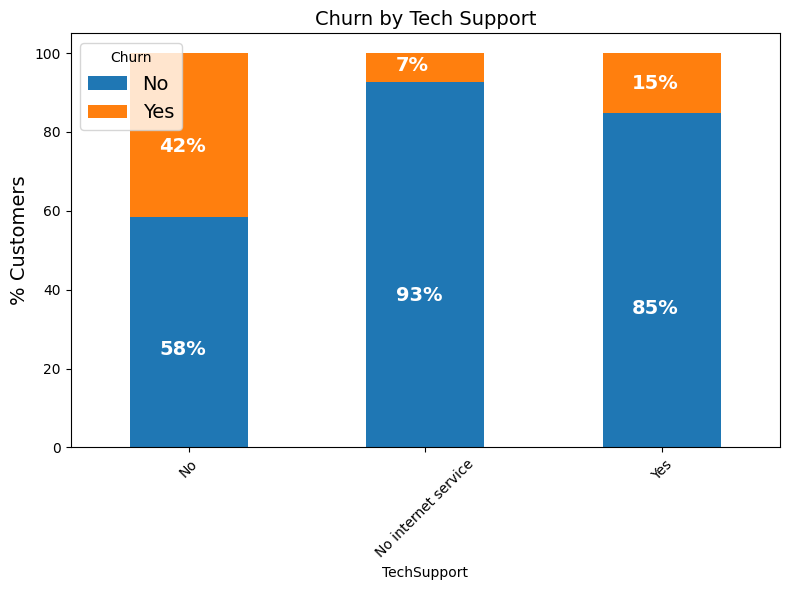

In [31]:
churn = df.groupby(['TechSupport', 'Churn']).size().unstack()
churn_percentage = (churn.T * 100.0 / churn.T.sum()).T

# Plotting the stacked bar chart
ax = churn_percentage.plot(kind='bar', stacked=True, rot=0, figsize=(8, 6))

ax.legend(loc='best', prop={'size': 14}, title='Churn')
ax.set_ylabel('% Customers', size=14)
ax.set_title('Churn by Tech Support', size=14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height),
                (p.get_x() + .25 * width, p.get_y() + .4 * height),
                color='white', weight='bold', size=14)

# Rotate x-axis ticks to 45 or 60 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Adjust the rotation angle as needed

plt.tight_layout()
plt.show()

As we explored before people who does'nt have tech support are churn rate of 42%.

### 7. Monthly charges vs Churn

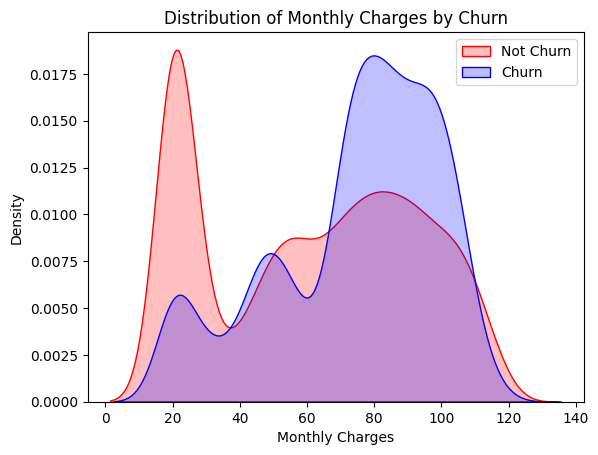

In [32]:
# Filtering the data based on churn status
not_churn = df.MonthlyCharges[df["Churn"] == 'No']
churn = df.MonthlyCharges[df["Churn"] == 'Yes']

# Creating a KDE plot for not churned customers
ax = sns.kdeplot(not_churn, color="Red", shade=True)

# Overlay a KDE plot for churned customers on the same axes
ax = sns.kdeplot(churn, ax=ax, color="Blue", shade=True)

# Set legend and labels
ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of Monthly Charges by Churn')

# Show the plot
plt.show()


`Observation`:
- The more the charges the more cutomers are likely to churn
- After some point customer might feel burden to stay with high charges.
- Instead of coping up with the charges, they are churning towards other companies

### HeatMap

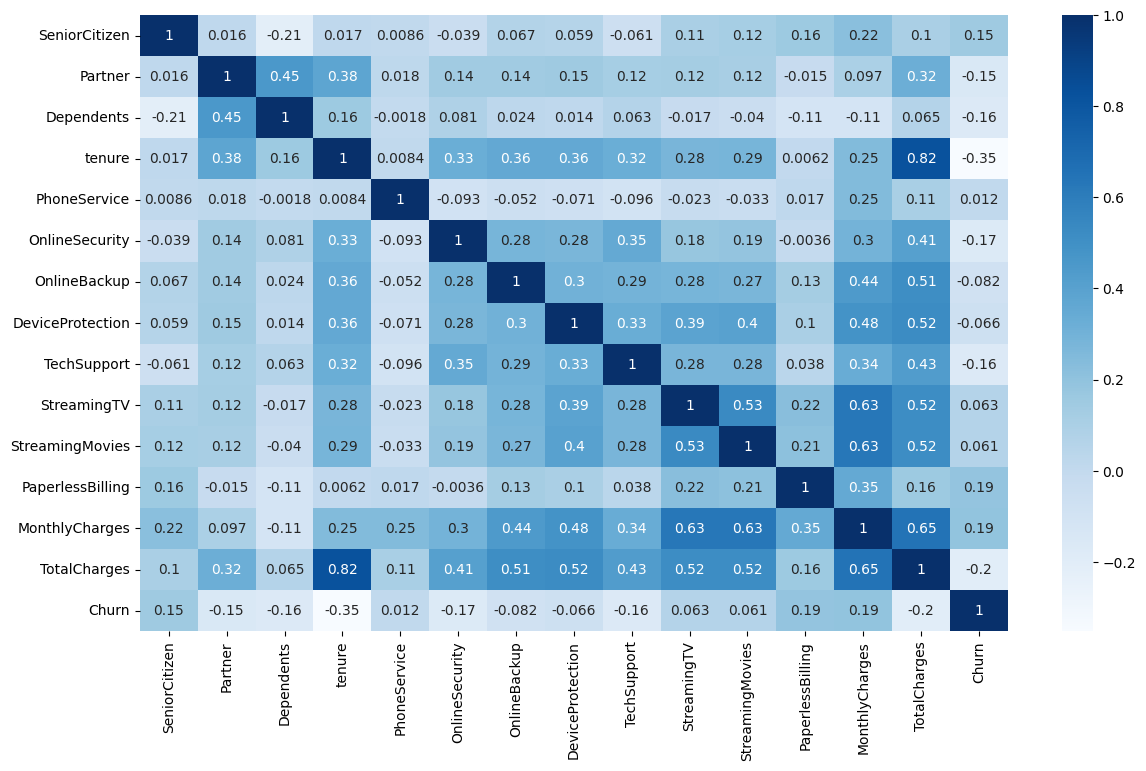

In [33]:
#adjusting the figure size for better
plt.figure(figsize=(14,8))

#creating the heatmap
sns.heatmap(df2.corr(numeric_only=True),annot=True, cmap='Blues')
plt.show()

### Feature Selection

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder

# creating an object of these Classes
sc = StandardScaler()
ohe = OneHotEncoder()

data = df2.copy()
# dropping weak associated columnn as per ChiSquare and Cramers V
data.drop(columns=['MultipleLines','StreamingMovies','gender',
                  'SeniorCitizen','Partner','Dependents','customerID'],inplace=True)

# encoding the cat variables
dummy = pd.get_dummies(data, columns=['InternetService','Contract','PaymentMethod'],
                       drop_first=True, dtype='int')

### Recursive Feature Elimination

In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = dummy.drop(columns=['Churn'],axis=1)
y = dummy['Churn']

# Model to use for feature selection
model = LogisticRegression(solver='liblinear')

# Initializing RFE with the model and number of features to select
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X, y)

# Summarize the selection of the attributes
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

# Print the selected features
selected_features = X.columns[fit.support_]
print("Selected Features:", selected_features)


Num Features: 10
Selected Features: [False  True  True  True False  True False  True False False  True  True
  True  True False  True False]
Feature Ranking: [5 1 1 1 4 1 3 1 6 8 1 1 1 1 2 1 7]
Selected Features: Index(['PhoneService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport',
       'PaperlessBilling', 'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check'],
      dtype='object')


### Tree Based Feature Importance

In [36]:
y = dummy['Churn']
X = dummy.drop(columns=['Churn'],axis=1)

from sklearn.ensemble import RandomForestClassifier

# Model to use for feature selection
model = RandomForestClassifier()

# Fit the model
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Convert to a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

                                  Feature  Importance
9                            TotalCharges    0.247016
8                          MonthlyCharges    0.228753
0                                  tenure    0.191021
10            InternetService_Fiber optic    0.046479
15         PaymentMethod_Electronic check    0.041168
13                      Contract_Two year    0.038799
12                      Contract_One year    0.027350
7                        PaperlessBilling    0.026986
5                             TechSupport    0.023047
2                          OnlineSecurity    0.022990
3                            OnlineBackup    0.022268
4                        DeviceProtection    0.019192
6                             StreamingTV    0.016572
11                     InternetService_No    0.014885
14  PaymentMethod_Credit card (automatic)    0.013301
16             PaymentMethod_Mailed check    0.012848
1                            PhoneService    0.007324


After applying all the techniques i have decided to drop phone service column. Although it showed importance in RFE, in the EDA there is less importance of that column

In [37]:
# dropping the PhoneService column
dummy.drop(columns=['PhoneService'],inplace=True)

In [38]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd

# Assuming df_outliers is your DataFrame containing the data
# Let's say X contains the feature columns and y contains the target variable
x = dummy.drop(columns=['Churn'],axis=1)
y = dummy['Churn']

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Generate synthetic data
X_resampled, y_resampled = smote.fit_resample(x, y)

# Check the class distribution after SMOTE
print("Original class distribution:", Counter(y))
print("Resampled class distribution:", Counter(y_resampled))

# Create a DataFrame from the resampled data
columns = x.columns
resampled_df = pd.DataFrame(X_resampled, columns=columns)
resampled_df['Churn'] = y_resampled


Original class distribution: Counter({0: 5174, 1: 1869})
Resampled class distribution: Counter({0: 5174, 1: 5174})


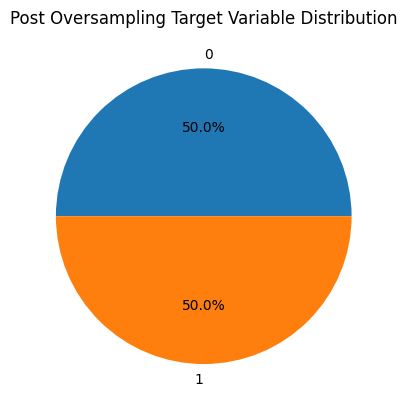

In [41]:
resampled = resampled_df['Churn'].value_counts()

plt.pie(resampled, labels=resampled.index, autopct='%1.1f%%')
plt.title('Post Oversampling Target Variable Distribution')
plt.show()

In [43]:
from sklearn.model_selection import train_test_split

X = resampled_df.drop(columns=['Churn'],axis=1)
y = resampled_df['Churn']

print(X.shape)
print(y.shape)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10348, 16)
(10348,)
(8278, 16)
(2070, 16)
(8278,)
(2070,)


In [45]:
sc = StandardScaler()
x_train = pd.DataFrame(sc.fit_transform(x_train))
x_test = pd.DataFrame(sc.transform(x_test))

## Model Building

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [48]:
from time import time

pipelines = {
  'Logistic Regression': Pipeline([('Classifier', LogisticRegression(class_weight ='balanced'))]),
    #'SVC': Pipeline([('Classifier', SVC(kernel='linear'))]),
    'Decision Tree': Pipeline([('Classifier', DecisionTreeClassifier(criterion='entropy', max_depth=8))]),
    'KNN': Pipeline([('Classifier', KNeighborsClassifier(n_neighbors=4))]),
  'Random Forest':Pipeline([('Classifier', RandomForestClassifier(max_depth=8, n_estimators=100))])}

for name, pipeline in pipelines.items():
    start_time = time()  # Record start time
    pipeline.fit(x_train, y_train)
    predictions = pipeline.predict(x_test)
    end_time = time()  # Record end time

    accuracy = accuracy_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)
    class_report = classification_report(y_test, predictions)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")
    print(f"Time taken to predict: {end_time - start_time} seconds")
    print()

Model: Logistic Regression
Accuracy: 0.827536231884058
Confusion Matrix:
[[800 221]
 [136 913]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.82      1021
           1       0.81      0.87      0.84      1049

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070

Time taken to predict: 0.04904007911682129 seconds

Model: Decision Tree
Accuracy: 0.8009661835748793
Confusion Matrix:
[[789 232]
 [180 869]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1021
           1       0.79      0.83      0.81      1049

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070

Time taken to predict: 0.047800540924072266 seconds

Model: K

## Let's Undersample the data and build a model and check how model performs

In [52]:
# lets use under sampling and try to build a model on that

class_0 = dummy[dummy['Churn'] == 0]
class_1 = dummy[dummy['Churn'] == 1]

# Randomly sample 5953 instances from class 0
class_0_balanced = class_0.sample(n=1869, random_state=42)

# Concatenate the balanced class 0 with class 1
balanced_df = pd.concat([class_0_balanced, class_1])

# Shuffle the rows to mix the classes
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the balanced class distribution
print(balanced_df['Churn'].value_counts())

Churn
0    1869
1    1869
Name: count, dtype: int64


In [54]:
y = balanced_df['Churn']
X = balanced_df.drop(columns=['Churn'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(X,y, train_size=0.75, random_state=42)

print(x_train.shape)
print(y_train.shape)
print()
print(x_test.shape)
print(y_test.shape)


sc = StandardScaler()
x_train = pd.DataFrame(sc.fit_transform(x_train))
x_test = pd.DataFrame(sc.transform(x_test))

(2803, 16)
(2803,)

(935, 16)
(935,)


In [55]:
from time import time

pipelines = {
  'Logistic Regression': Pipeline([('Classifier', LogisticRegression(class_weight ='balanced'))]),
    #'SVC': Pipeline([('Classifier', SVC(kernel='linear'))]),
    'Decision Tree': Pipeline([('Classifier', DecisionTreeClassifier(criterion='entropy', max_depth=8))]),
    'KNN': Pipeline([('Classifier', KNeighborsClassifier(n_neighbors=4))]),
  'Random Forest':Pipeline([('Classifier', RandomForestClassifier(max_depth=8, n_estimators=100))])}

for name, pipeline in pipelines.items():
    start_time = time()  # Record start time
    pipeline.fit(x_train, y_train)
    predictions = pipeline.predict(x_test)
    end_time = time()  # Record end time

    accuracy = accuracy_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)
    class_report = classification_report(y_test, predictions)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")
    print(f"Time taken to predict: {end_time - start_time} seconds")
    print()

Model: Logistic Regression
Accuracy: 0.7796791443850267
Confusion Matrix:
[[360 125]
 [ 81 369]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       485
           1       0.75      0.82      0.78       450

    accuracy                           0.78       935
   macro avg       0.78      0.78      0.78       935
weighted avg       0.78      0.78      0.78       935

Time taken to predict: 0.09155869483947754 seconds

Model: Decision Tree
Accuracy: 0.7401069518716578
Confusion Matrix:
[[331 154]
 [ 89 361]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       485
           1       0.70      0.80      0.75       450

    accuracy                           0.74       935
   macro avg       0.74      0.74      0.74       935
weighted avg       0.75      0.74      0.74       935

Time taken to predict: 0.028128862380981445 seconds

Model: 

## Let's build a model on orginal imbalance data and check the results

In [58]:
y = dummy['Churn']
X = dummy.drop(columns=['Churn'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(X,y, train_size=0.75, random_state=42)

print(x_train.shape)
print(y_train.shape)
print()
print(x_test.shape)
print(y_test.shape)

sc = StandardScaler()
x_train = pd.DataFrame(sc.fit_transform(x_train))
x_test = pd.DataFrame(sc.transform(x_test))

(5282, 16)
(5282,)

(1761, 16)
(1761,)


In [64]:
from time import time

pipelines = {
  'Logistic Regression': Pipeline([('Classifier', LogisticRegression(class_weight ='balanced'))]),
    #'SVC': Pipeline([('Classifier', SVC(kernel='linear'))]),
    'Decision Tree': Pipeline([('Classifier', DecisionTreeClassifier(criterion='entropy', max_depth=8))]),
    'KNN': Pipeline([('Classifier', KNeighborsClassifier(n_neighbors=4))]),
  'Random Forest':Pipeline([('Classifier', RandomForestClassifier(max_depth=8, n_estimators=100))])}

for name, pipeline in pipelines.items():
    start_time = time()  # Record start time
    pipeline.fit(x_train, y_train)
    predictions = pipeline.predict(x_test)
    end_time = time()  # Record end time

    accuracy = accuracy_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)
    class_report = classification_report(y_test, predictions)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")
    print(f"Time taken to predict: {end_time - start_time} seconds")
    print()

Model: Logistic Regression
Accuracy: 0.7558205565019875
Confusion Matrix:
[[935 347]
 [ 83 396]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1282
           1       0.53      0.83      0.65       479

    accuracy                           0.76      1761
   macro avg       0.73      0.78      0.73      1761
weighted avg       0.81      0.76      0.77      1761

Time taken to predict: 0.06906604766845703 seconds

Model: Decision Tree
Accuracy: 0.7864849517319704
Confusion Matrix:
[[1127  155]
 [ 221  258]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1282
           1       0.62      0.54      0.58       479

    accuracy                           0.79      1761
   macro avg       0.73      0.71      0.72      1761
weighted avg       0.78      0.79      0.78      1761

Time taken to predict: 0.05278372764587402 seconds

Mode

**`Observation`**
**Case-1**
- In the three cases Logistic Regression performs well than Random Forest
- In th first case Logistic Regression returned an output with an Accuracy of 82% and Precision 85 at identifying Non Churn customers and 81% at identifying Churn customers
- False Positive number is less compared to other models but equal with Random forest
- Hence We can say Logistic Regression performs equal with when it is Balanced Data

**Case-2**
- In the case two when there is very limited amount of data Logistic Regression still managed to deliver equal amount of results to Random Forest
- Notably the time taken was very quick compared to Random Forest.

**Case-3**
- In the case three where there is imbalance data, we can see decrease in precision at identifying Churn customers
- But the False Negative number is very less compared to other algorthms

**Which Algorithmn to choose?**
1. Random Forest is tree based algorthm, when fed with large data it often takes huge number of training time
2. Logistic Regression can be useful in these three scenarios